In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

# Load the multimodal_IC_weights.csv file
multimodal_df = pd.read_csv('subject_loadings_multimodal.csv')
multimodal_df_filtered = multimodal_df.drop(columns=['RID', 'GENDER', 'SITE', 'RACE', 'HEAD_MOTION', 'AGE'])
# Rename all columns that start with 'IC' by adding '_multimodal' postfix
multimodal_df_filtered = multimodal_df_filtered.rename(columns={col: col + '_multimodal' for col in multimodal_df_filtered.columns if col.startswith('IC')})

pet_df = pd.read_csv('subject_loadings_PET_only.csv')
# Remove unnecessary columns from PET_IC_weights.csv
pet_df_filtered = pet_df.drop(columns=['RID', 'GENDER', 'SITE', 'RACE', 'HEAD_MOTION', 'AGE'])
pet_df_filtered = pet_df_filtered.rename(columns={col: col + '_PET' for col in pet_df_filtered.columns if col.startswith('IC')})

fnc_df = pd.read_csv('subject_loadings_FNC_only.csv')
fnc_df_filtered = fnc_df.drop(columns=['RID', 'GENDER', 'SITE', 'RACE', 'HEAD_MOTION', 'AGE', 'DX'])
fnc_df_filtered = fnc_df_filtered.rename(columns={col: col + '_FNC' for col in fnc_df_filtered.columns if col.startswith('IC')})

# Merge the modified multimodal data with the PET data
# merged_df = pd.concat([multimodal_df_filtered, pet_df_filtered, fnc_df_filtered], axis=1)
merged_df = pd.concat([pet_df_filtered, fnc_df_filtered], axis=1)

# Save the resulting DataFrame to a new CSV file
merged_df.to_csv('PET+FNC_subject_loadings.csv', index=False)


In [ ]:
# Load the dataset
df = pd.read_csv('subject_loadings_multimodal.csv')
df = df.drop(columns=['RID', 'GENDER', 'SITE', 'RACE', 'HEAD_MOTION', 'AGE'])


In [ ]:
print(df[df['DX'].isin(['Dementia','MCI', 'CN'])]['DX'].value_counts())


DX
CN          147
MCI          80
Dementia     66
Name: count, dtype: int64


In [125]:
df.describe()

,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,0.007601,0.002649,0.009627,0.173149,-0.014053,0.007221,0.018022,-0.016574,0.056630,-0.105378,0.112553
std,0.020722,0.015422,0.022234,0.037013,0.026754,0.023281,0.018817,0.035166,0.031259,0.027763,0.026731
min,-0.041343,-0.044022,-0.033177,0.074664,-0.100330,-0.066573,-0.016578,-0.110485,0.002520,-0.195290,0.054971
25%,-0.005848,-0.006395,-0.006543,0.146237,-0.031613,-0.006369,0.005626,-0.044569,0.032249,-0.122609,0.091855
50%,0.005143,0.004486,0.005474,0.176018,-0.011592,0.008727,0.014669,-0.008506,0.049344,-0.106416,0.107097
75%,0.019309,0.012395,0.020882,0.197075,0.005211,0.024658,0.029155,0.014847,0.078827,-0.086706,0.131368
max,0.070934,0.044446,0.096101,0.305852,0.053345,0.061068,0.089036,0.036671,0.139233,-0.013675,0.186275


In [123]:
null_counts = df.isnull().sum()

# Check if any column has missing values
if (null_counts > 0).any():
    print("Columns with missing values:")
    print(null_counts[null_counts > 0])
else:
    print("No missing values!")

No missing values!


# UMAP visualization

**Features from FNC**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


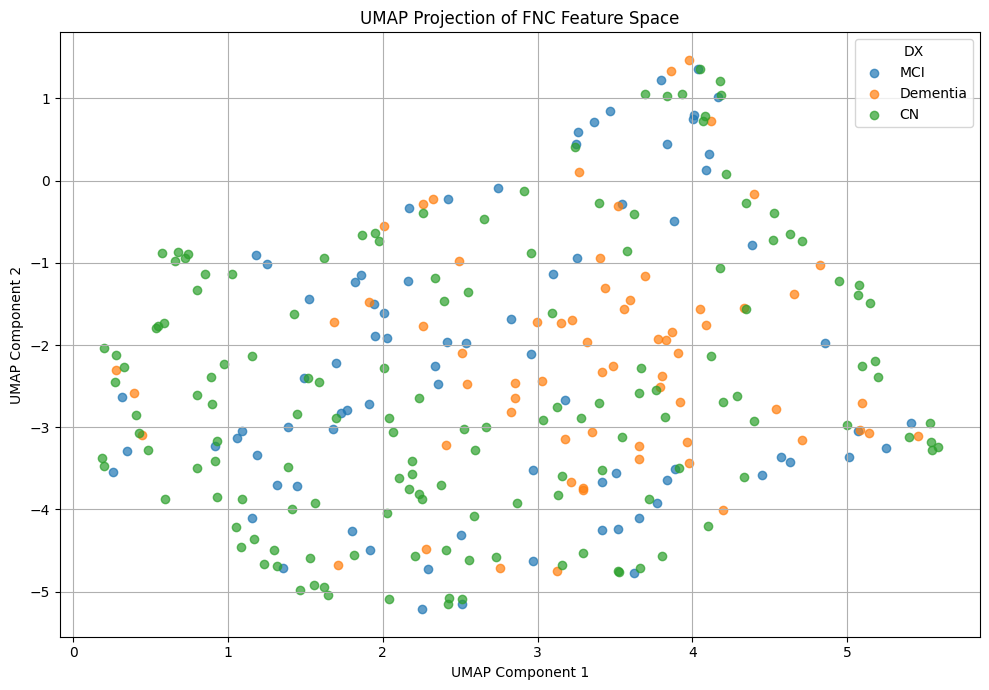

In [135]:
import umap
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('subject_loadings_FNC_only.csv')
# Drop non-feature columns
df = df.drop(columns=['RID', 'GENDER', 'SITE', 'RACE', 'HEAD_MOTION', 'AGE'])

X = df.drop(columns=['DX']).values
y = df['DX'].values

# Encode labels for color mapping
y_codes, y_unique = pd.factorize(y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# Plotting
plt.figure(figsize=(10, 7))
for i, label in enumerate(y_unique):
    idx = y_codes == i
    plt.scatter(X_umap[idx, 0], X_umap[idx, 1], label=label, alpha=0.7)

plt.title('UMAP Projection of FNC Feature Space')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='DX')
plt.grid(True)
plt.tight_layout()
plt.savefig('umap_FNC.png', dpi=600)

plt.show()


**Features from PET**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


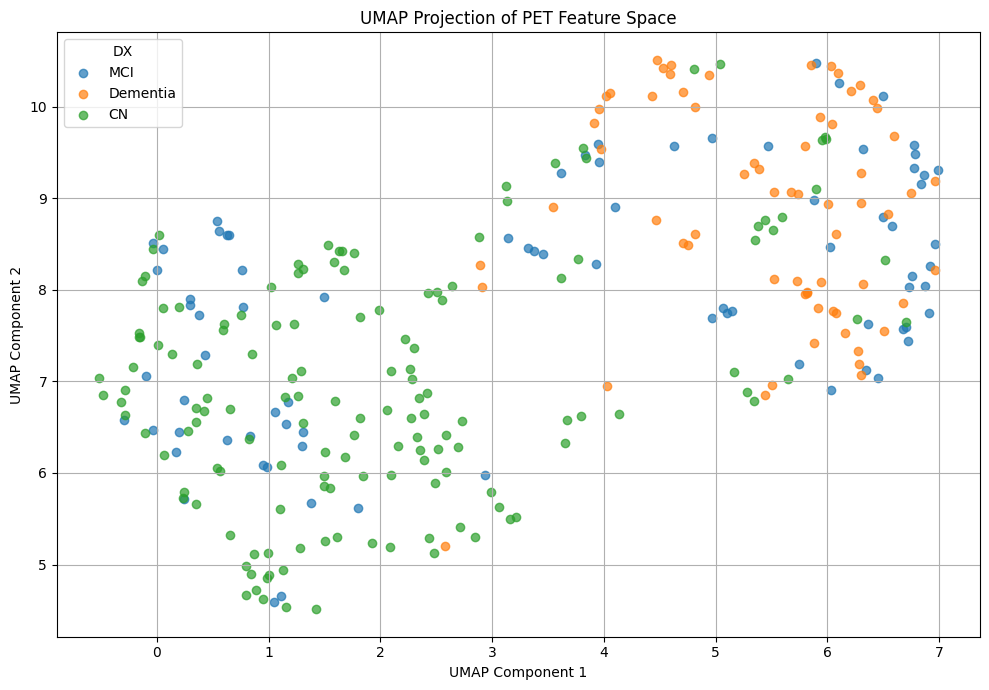

In [134]:
import umap
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('subject_loadings_PET_only.csv')
df = df.drop(columns=['RID', 'GENDER', 'SITE', 'RACE', 'HEAD_MOTION', 'AGE'])

X = df.drop(columns=['DX']).values
y = df['DX'].values

# Encode labels for color mapping
y_codes, y_unique = pd.factorize(y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# Plotting
plt.figure(figsize=(10, 7))
for i, label in enumerate(y_unique):
    idx = y_codes == i
    plt.scatter(X_umap[idx, 0], X_umap[idx, 1], label=label, alpha=0.7)

plt.title('UMAP Projection of PET Feature Space')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='DX')
plt.grid(True)
plt.tight_layout()
plt.savefig('umap_PET.png', dpi=600)

plt.show()


**Features from multimodal fusion of data**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


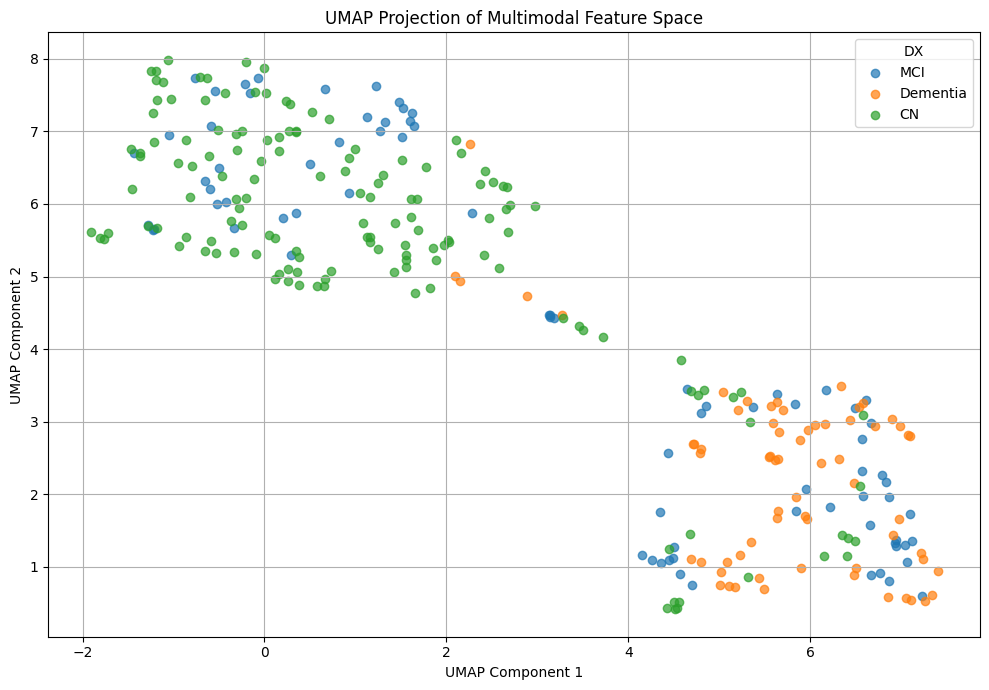

In [133]:
import umap
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('subject_loadings_multimodal.csv')
# Drop non-feature columns
df = df.drop(columns=['RID', 'GENDER', 'SITE', 'RACE', 'HEAD_MOTION', 'AGE'])

X = df.drop(columns=['DX']).values
y = df['DX'].values

# Encode labels for color mapping
y_codes, y_unique = pd.factorize(y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# Plotting
plt.figure(figsize=(10, 7))
for i, label in enumerate(y_unique):
    idx = y_codes == i
    plt.scatter(X_umap[idx, 0], X_umap[idx, 1], label=label, alpha=0.7)

plt.title('UMAP Projection of Multimodal Feature Space')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='DX')
plt.grid(True)
plt.tight_layout()
plt.savefig('umap_multimodal.png', dpi=600)
plt.show()


### Classification performance analysis - using several model

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import balanced_accuracy_score, f1_score
from xgboost import XGBClassifier

def evaluate_model(df, table_title="Evaluation Results"):
    # Drop unwanted columns
    df = df.drop(columns=['RID', 'GENDER', 'SITE', 'RACE', 'HEAD_MOTION', 'AGE'], errors='ignore')

    # Define binary class pairs
    class_pairs = {
        "Dementia vs CN": ['Dementia', 'CN'],
        "Dementia vs MCI": ['Dementia', 'MCI'],
        "MCI vs CN": ['MCI', 'CN']
    }

    n_folds = 5
    random_seeds = [42, 100, 202, 303, 404]

    svm_results, rf_results, xgb_results = [], [], []
    feature_importance_df = pd.DataFrame()

    for pair_name, classes in class_pairs.items():
        print(f"\nEvaluating: {pair_name}")

        # Filter data for the class pair
        df_binary = df[df['DX'].isin(classes)].copy()
        X = df_binary.drop(columns=['DX']).values

        # Encode string labels into numeric
        label_encoder = LabelEncoder()
        y = label_encoder.fit_transform(df_binary['DX'].values)
        print(f"Label encoding for {pair_name}: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")

        feature_names = df_binary.drop(columns=['DX']).columns
        svm_metrics = {'Balanced Accuracy': [], 'F1-Score': []}
        rf_metrics = {'Balanced Accuracy': [], 'F1-Score': []}
        xgb_metrics = {'Balanced Accuracy': [], 'F1-Score': []}

        for seed in random_seeds:
            skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=seed)
            for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
                X_train, X_test = X[train_idx], X[test_idx]
                y_train, y_test = y[train_idx], y[test_idx]

                # ------------------- SVM -------------------
                svm_model = make_pipeline(
                    StandardScaler(),
                    SVC(kernel='rbf', class_weight='balanced', random_state=seed)
                )
                svm_model.fit(X_train, y_train)
                y_pred_svm = svm_model.predict(X_test)

                svm_metrics['Balanced Accuracy'].append(balanced_accuracy_score(y_test, y_pred_svm))
                svm_metrics['F1-Score'].append(f1_score(y_test, y_pred_svm))

                # ------------------- Random Forest -------------------
                rf_model = RandomForestClassifier(
                    n_estimators=100, class_weight='balanced', random_state=seed
                )
                rf_model.fit(X_train, y_train)
                y_pred_rf = rf_model.predict(X_test)

                rf_metrics['Balanced Accuracy'].append(balanced_accuracy_score(y_test, y_pred_rf))
                rf_metrics['F1-Score'].append(f1_score(y_test, y_pred_rf))

                # Save RF feature importance
                importances = rf_model.feature_importances_
                feature_importance = pd.DataFrame({
                    'Feature': feature_names,
                    'Importance': importances,
                    'Fold': fold,
                    'Seed': seed,
                    'Group': pair_name
                })
                feature_importance_df = pd.concat([feature_importance_df, feature_importance], ignore_index=True)

                # ------------------- XGBoost -------------------
                xgb_model = XGBClassifier(
                    n_estimators=100,  eval_metric='logloss',
                    random_state=seed
                )
                xgb_model.fit(X_train, y_train)
                y_pred_xgb = xgb_model.predict(X_test)

                xgb_metrics['Balanced Accuracy'].append(balanced_accuracy_score(y_test, y_pred_xgb))
                xgb_metrics['F1-Score'].append(f1_score(y_test, y_pred_xgb))

        # Aggregate results
        def summarize(metrics):
            return {
                'Balanced Accuracy (Mean ± SD)': f"{np.mean(metrics['Balanced Accuracy']):.2f} ± {np.std(metrics['Balanced Accuracy']):.2f}",
                'F1 Score (Mean ± SD)': f"{np.mean(metrics['F1-Score']):.2f} ± {np.std(metrics['F1-Score']):.2f}"
            }

        svm_results.append({'Model': 'SVM', 'Group': pair_name, **summarize(svm_metrics)})
        rf_results.append({'Model': 'Random Forest', 'Group': pair_name, **summarize(rf_metrics)})
        xgb_results.append({'Model': 'XGBoost', 'Group': pair_name, **summarize(xgb_metrics)})

    # Show results
    print(table_title)
    print("\nSVM:")
    print(pd.DataFrame(svm_results))
    print("\nRandom Forest:")
    print(pd.DataFrame(rf_results))
    print("\nXGBoost:")
    print(pd.DataFrame(xgb_results))

    # Plot feature importance from RF
    agg_feat_imp = feature_importance_df.groupby(['Feature', 'Group'], as_index=False)['Importance'].mean()
    agg_feat_imp = agg_feat_imp.sort_values(by='Importance', ascending=False)

    for group_name in class_pairs.keys():
        print(f"\nTop 5 Important Features for {group_name} (Random Forest):")
        top_features = agg_feat_imp[agg_feat_imp['Group'] == group_name].head(5)
        print(top_features)
        plt.figure(figsize=(10, 6))
        plt.barh(top_features['Feature'], top_features['Importance'], color='steelblue')
        plt.title(f'Top 5 Features: {group_name}')
        plt.xlabel('Mean Importance Score (RF)')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()



Evaluating: Dementia vs CN
Label encoding for Dementia vs CN: {'CN': np.int64(0), 'Dementia': np.int64(1)}

Evaluating: Dementia vs MCI
Label encoding for Dementia vs MCI: {'Dementia': np.int64(0), 'MCI': np.int64(1)}

Evaluating: MCI vs CN
Label encoding for MCI vs CN: {'CN': np.int64(0), 'MCI': np.int64(1)}

 Evaluation Metrics - (FNC only)

SVM:
  Model            Group Balanced Accuracy (Mean ± SD) F1 Score (Mean ± SD)
0   SVM   Dementia vs CN                   0.71 ± 0.08          0.60 ± 0.10
1   SVM  Dementia vs MCI                   0.67 ± 0.06          0.71 ± 0.06
2   SVM        MCI vs CN                   0.67 ± 0.05          0.59 ± 0.06

Random Forest:
           Model            Group Balanced Accuracy (Mean ± SD)  \
0  Random Forest   Dementia vs CN                   0.64 ± 0.06   
1  Random Forest  Dementia vs MCI                   0.63 ± 0.07   
2  Random Forest        MCI vs CN                   0.58 ± 0.06   

  F1 Score (Mean ± SD)  
0          0.47 ± 0.12  
1        

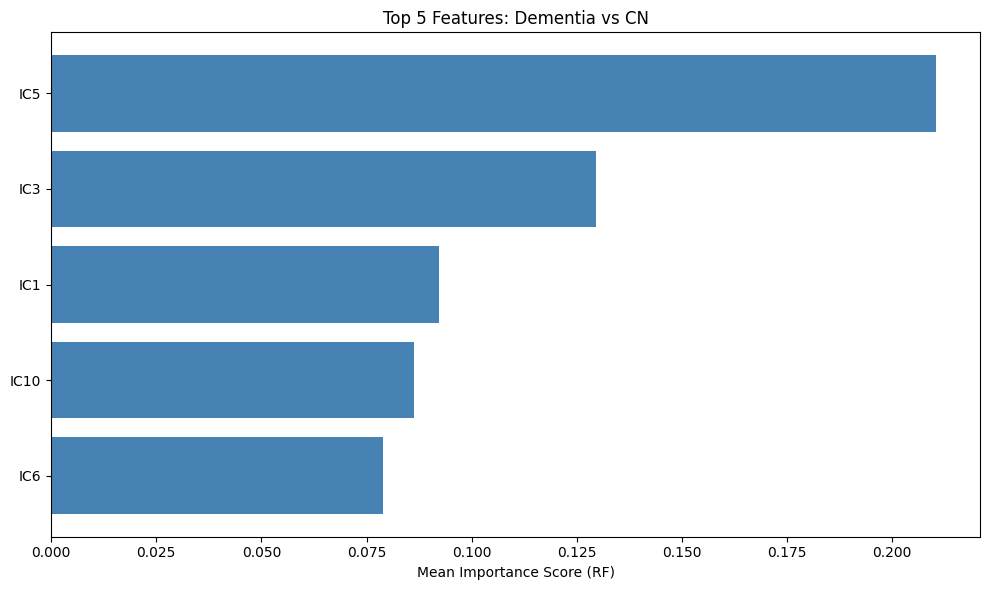


Top 5 Important Features for Dementia vs MCI (Random Forest):
   Feature            Group  Importance
19     IC5  Dementia vs MCI    0.131616
13     IC3  Dementia vs MCI    0.108867
16     IC4  Dementia vs MCI    0.100355
10     IC2  Dementia vs MCI    0.090542
1      IC1  Dementia vs MCI    0.090292


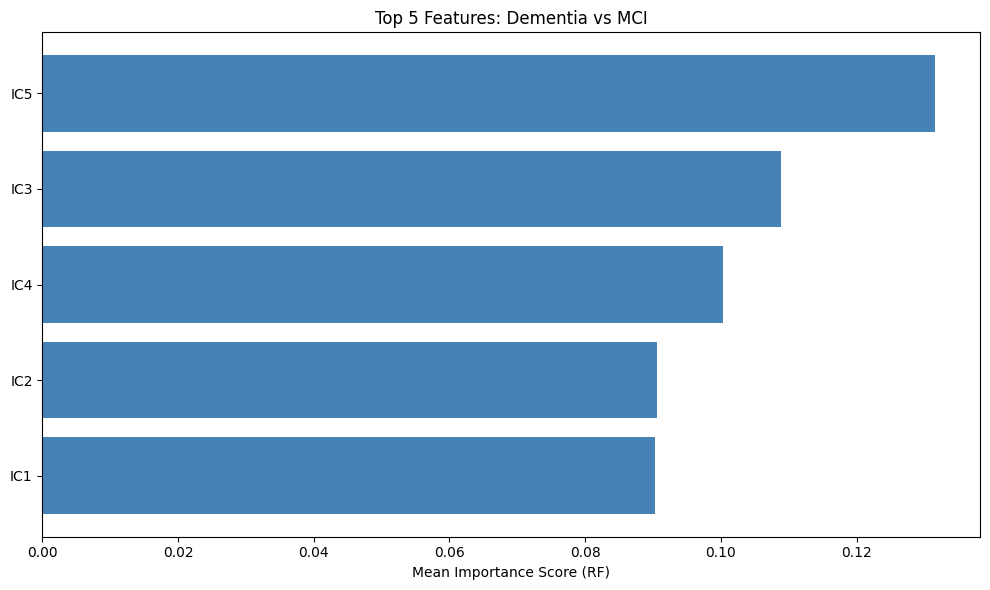


Top 5 Important Features for MCI vs CN (Random Forest):
   Feature      Group  Importance
20     IC5  MCI vs CN    0.126053
14     IC3  MCI vs CN    0.109185
17     IC4  MCI vs CN    0.097030
23     IC6  MCI vs CN    0.095573
5     IC10  MCI vs CN    0.091142


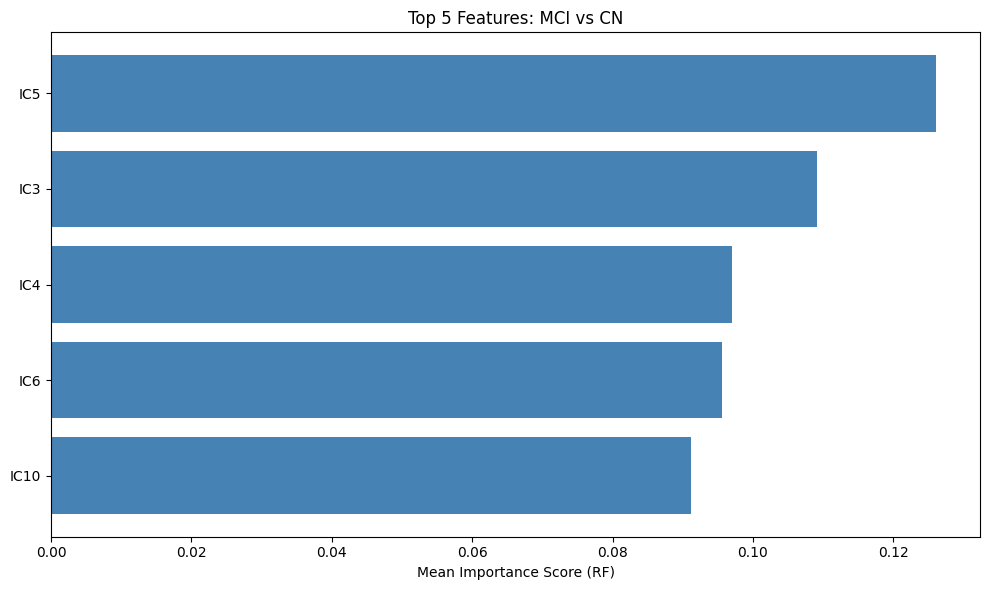

In [ ]:
# For FNC data
df_pet = pd.read_csv('subject_loadings_FNC_only.csv')
df_pet = df_pet.drop(columns=['RID', 'GENDER', 'SITE', 'RACE', 'HEAD_MOTION', 'AGE'])
evaluate_model(df_pet, table_title="\n Evaluation Metrics - (FNC only)")


Evaluating: Dementia vs CN
Label encoding for Dementia vs CN: {'CN': np.int64(0), 'Dementia': np.int64(1)}

Evaluating: Dementia vs MCI
Label encoding for Dementia vs MCI: {'Dementia': np.int64(0), 'MCI': np.int64(1)}

Evaluating: MCI vs CN
Label encoding for MCI vs CN: {'CN': np.int64(0), 'MCI': np.int64(1)}

 Evaluation Metrics - (PET only)

SVM:
  Model            Group Balanced Accuracy (Mean ± SD) F1 Score (Mean ± SD)
0   SVM   Dementia vs CN                   0.91 ± 0.04          0.86 ± 0.05
1   SVM  Dementia vs MCI                   0.75 ± 0.07          0.74 ± 0.09
2   SVM        MCI vs CN                   0.75 ± 0.04          0.67 ± 0.06

Random Forest:
           Model            Group Balanced Accuracy (Mean ± SD)  \
0  Random Forest   Dementia vs CN                   0.86 ± 0.05   
1  Random Forest  Dementia vs MCI                   0.74 ± 0.08   
2  Random Forest        MCI vs CN                   0.75 ± 0.04   

  F1 Score (Mean ± SD)  
0          0.81 ± 0.07  
1        

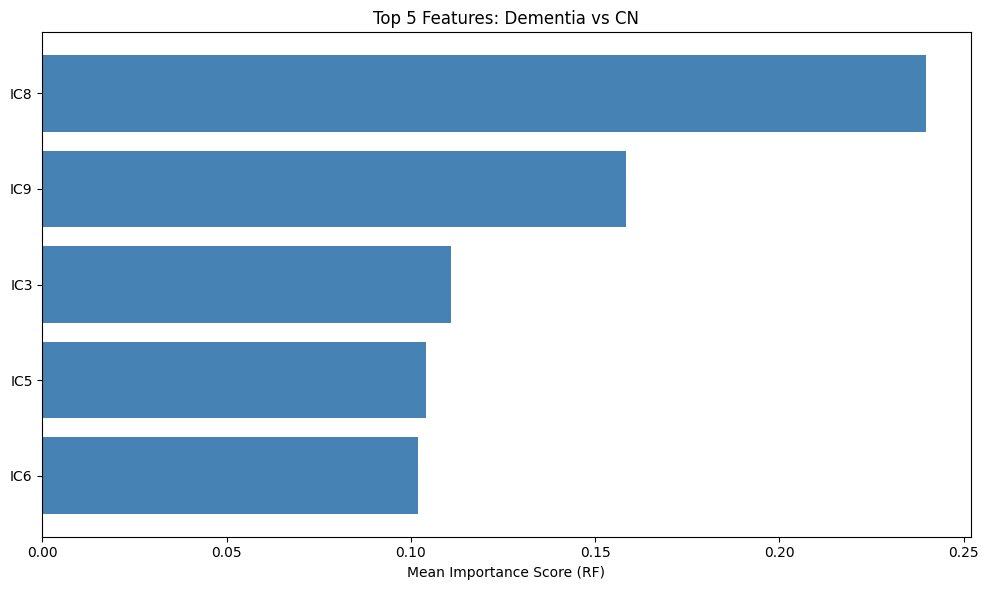


Top 5 Important Features for Dementia vs MCI (Random Forest):
   Feature            Group  Importance
16     IC4  Dementia vs MCI    0.152313
28     IC8  Dementia vs MCI    0.137661
31     IC9  Dementia vs MCI    0.102233
25     IC7  Dementia vs MCI    0.094294
13     IC3  Dementia vs MCI    0.084216


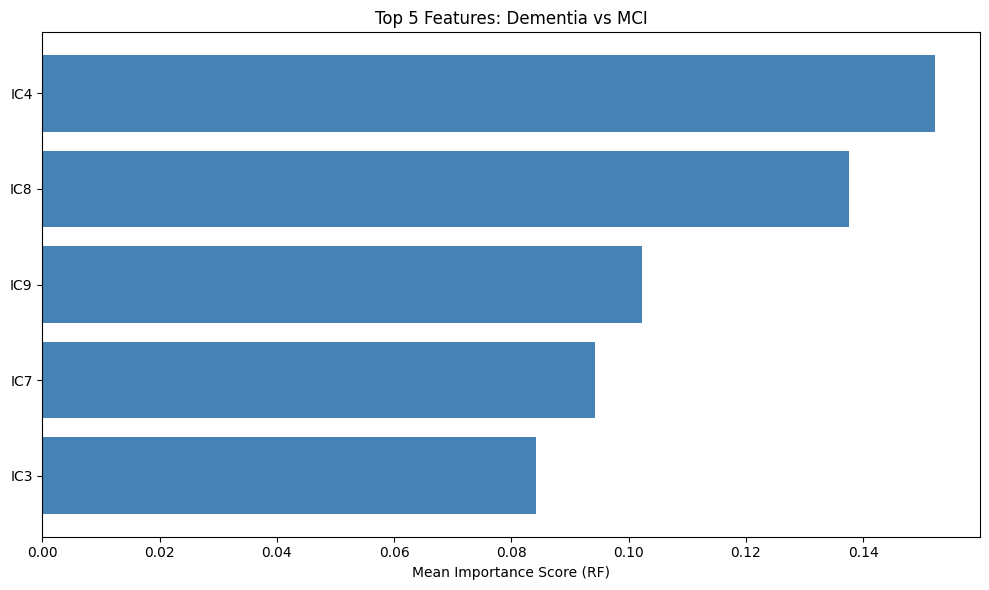


Top 5 Important Features for MCI vs CN (Random Forest):
   Feature      Group  Importance
20     IC5  MCI vs CN    0.194214
29     IC8  MCI vs CN    0.114937
14     IC3  MCI vs CN    0.095409
23     IC6  MCI vs CN    0.092897
32     IC9  MCI vs CN    0.080167


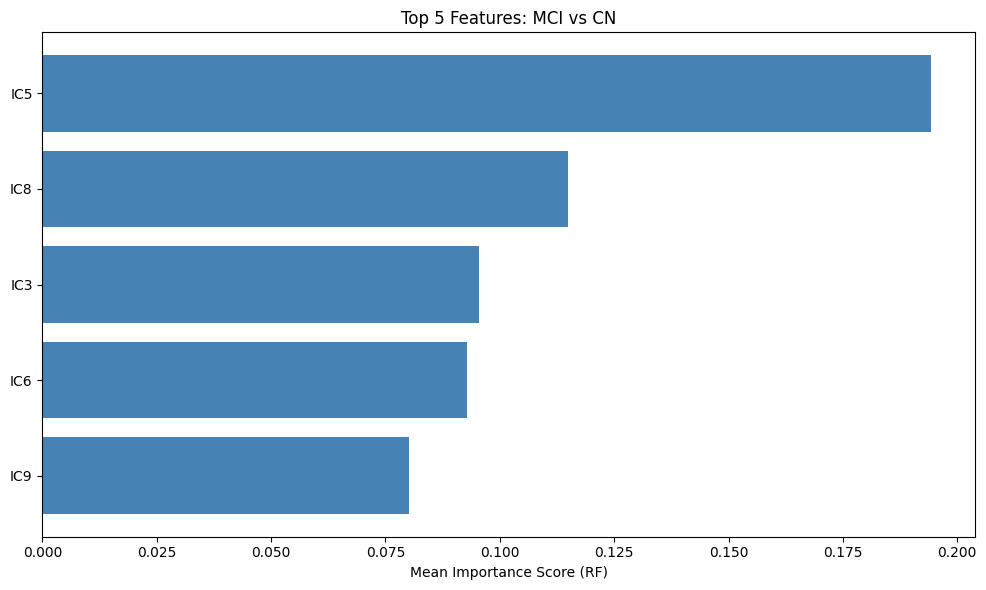

In [ ]:
# For PET data
df_pet = pd.read_csv('subject_loadings_PET_only.csv')
df_pet = df_pet.drop(columns=['RID', 'GENDER', 'SITE', 'RACE', 'HEAD_MOTION', 'AGE'])
evaluate_model(df_pet, table_title="\n Evaluation Metrics - (PET only)")


Evaluating: Dementia vs CN
Label encoding for Dementia vs CN: {'CN': np.int64(0), 'Dementia': np.int64(1)}

Evaluating: Dementia vs MCI
Label encoding for Dementia vs MCI: {'Dementia': np.int64(0), 'MCI': np.int64(1)}

Evaluating: MCI vs CN
Label encoding for MCI vs CN: {'CN': np.int64(0), 'MCI': np.int64(1)}

 Evaluation Metrics - (multimodal)

SVM:
  Model            Group Balanced Accuracy (Mean ± SD) F1 Score (Mean ± SD)
0   SVM   Dementia vs CN                   0.92 ± 0.03          0.87 ± 0.04
1   SVM  Dementia vs MCI                   0.75 ± 0.06          0.72 ± 0.10
2   SVM        MCI vs CN                   0.78 ± 0.05          0.72 ± 0.07

Random Forest:
           Model            Group Balanced Accuracy (Mean ± SD)  \
0  Random Forest   Dementia vs CN                   0.89 ± 0.05   
1  Random Forest  Dementia vs MCI                   0.79 ± 0.07   
2  Random Forest        MCI vs CN                   0.76 ± 0.05   

  F1 Score (Mean ± SD)  
0          0.86 ± 0.07  
1      

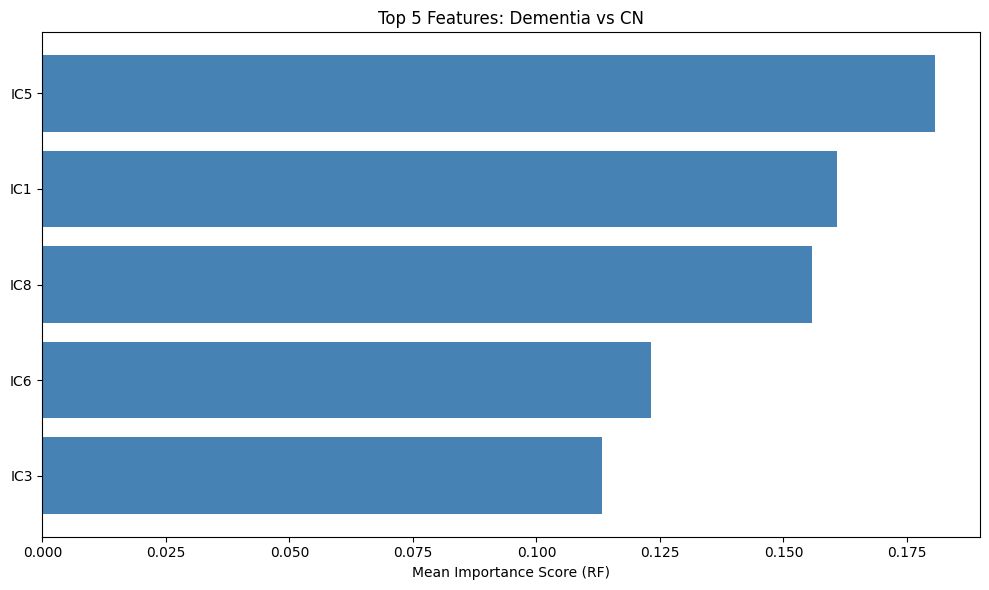


Top 5 Important Features for Dementia vs MCI (Random Forest):
   Feature            Group  Importance
31     IC9  Dementia vs MCI    0.150386
28     IC8  Dementia vs MCI    0.149476
19     IC5  Dementia vs MCI    0.117758
10     IC2  Dementia vs MCI    0.094331
7     IC11  Dementia vs MCI    0.082574


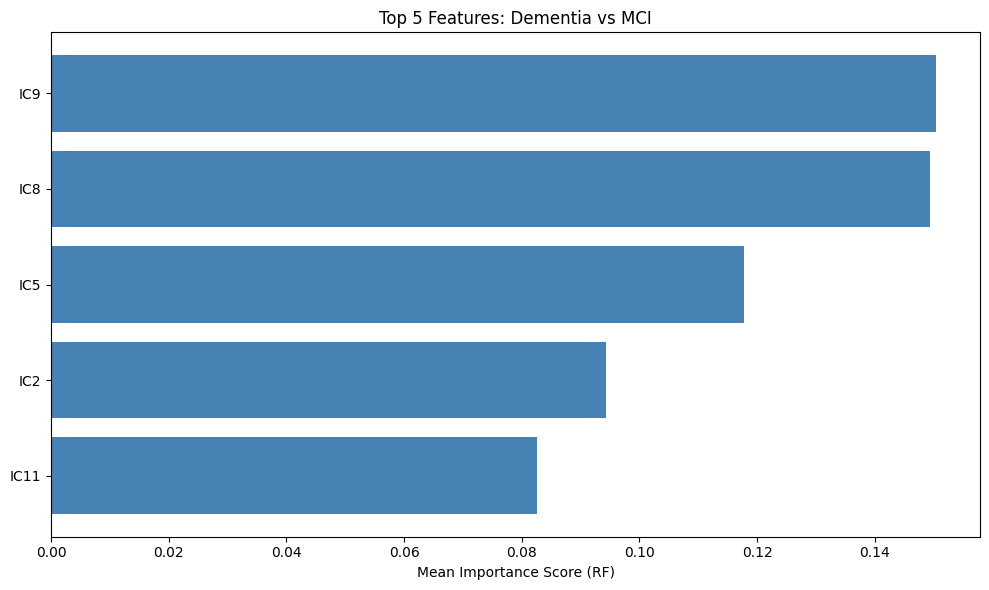


Top 5 Important Features for MCI vs CN (Random Forest):
   Feature      Group  Importance
2      IC1  MCI vs CN    0.197120
20     IC5  MCI vs CN    0.096421
23     IC6  MCI vs CN    0.095193
14     IC3  MCI vs CN    0.093497
17     IC4  MCI vs CN    0.083398


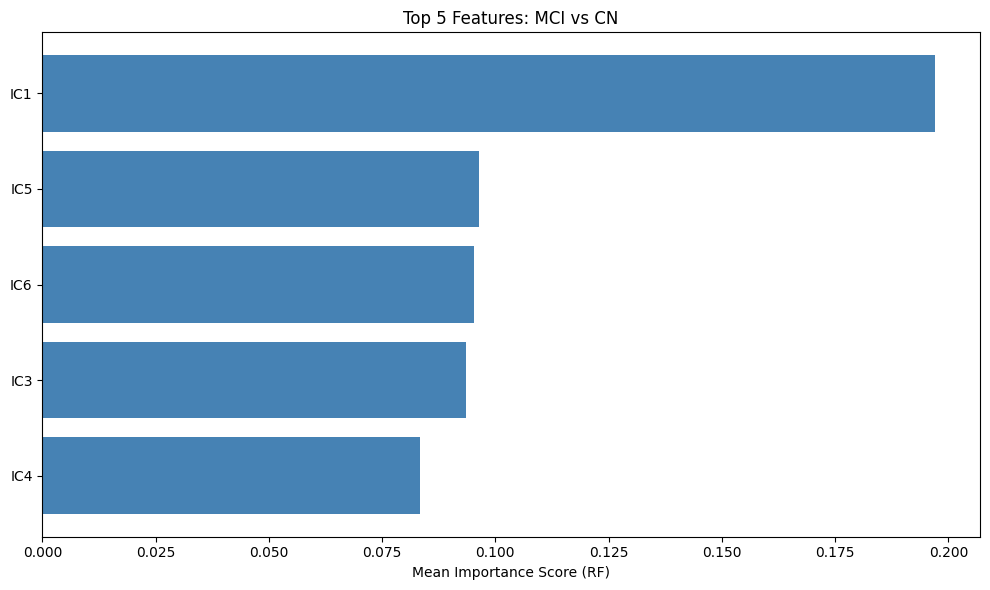

In [ ]:
# For multimodal data
df_pet = pd.read_csv('subject_loadings_multimodal.csv')
df_pet = df_pet.drop(columns=['RID', 'GENDER', 'SITE', 'RACE', 'HEAD_MOTION', 'AGE'])
evaluate_model(df_pet, table_title="\n Evaluation Metrics - (multimodal)")

### Analysing all the 33 features obtained from both unimodal and multimodal approaches

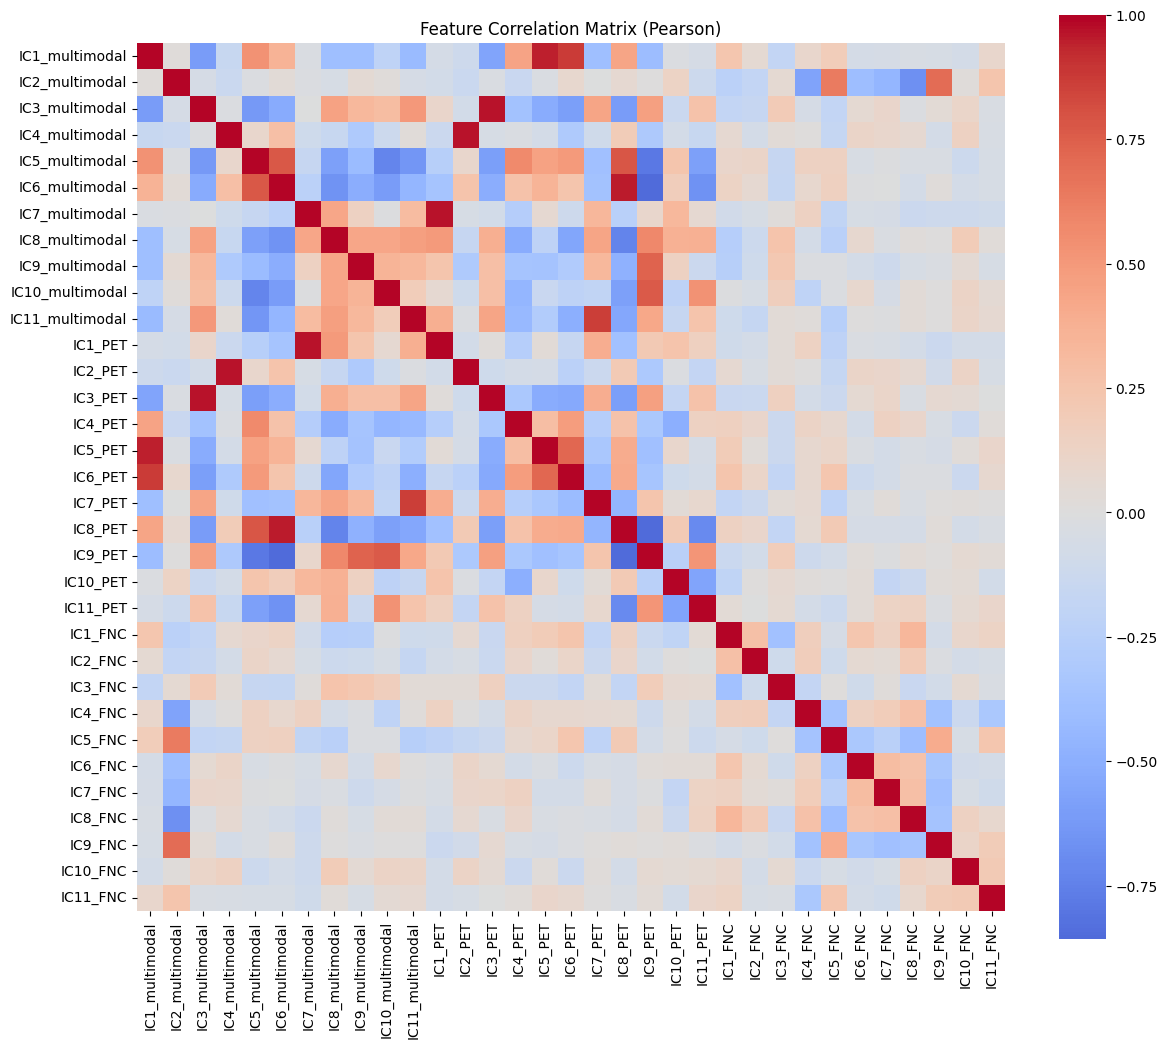

In [ ]:
import seaborn as sns

# Load data (all 33 features from PET, FNC, and multimodal)
df = pd.read_csv('all_subject_loadings.csv')
df = df.drop(columns=['DX'])

# Compute correlation matrix
corr_matrix = df.corr(method='pearson')

# Visualize as heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, square=True)
plt.title("Feature Correlation Matrix (Pearson)")
plt.show()


In [ ]:
# Identify highly correlated feature pairs
def get_highly_correlated_features(corr_matrix, threshold):
    correlated_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_value = corr_matrix.iloc[i, j]
            if abs(corr_value) > threshold:
                feature_1 = corr_matrix.columns[i]
                feature_2 = corr_matrix.columns[j]
                correlated_pairs.append((feature_1, feature_2, corr_value))
    return correlated_pairs

high_corr_pairs = get_highly_correlated_features(corr_matrix, threshold=0.9)
print("\nHighly Correlated Feature Pairs (|r| > 0.9):")
for f1, f2, corr in high_corr_pairs:
    print(f"{f1} <--> {f2} : r = {corr:.2f}")



Highly Correlated Feature Pairs (|r| > 0.9):
IC1_multimodal <--> IC5_PET : r = 0.95
IC3_multimodal <--> IC3_PET : r = 0.97
IC4_multimodal <--> IC2_PET : r = 0.97
IC6_multimodal <--> IC8_PET : r = 0.96
IC7_multimodal <--> IC1_PET : r = 0.97


In [128]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler

# data
df = pd.read_csv('all_subject_loadings.csv')
df = df.drop(columns=['IC1_PET', 'IC2_PET', 'IC3_PET', 'IC5_PET', 'IC8_PET'])

# Encode target variable
le = LabelEncoder()
df['DX'] = le.fit_transform(df['DX'])

# Separate features and target
X = df.drop(columns=['DX'])
y = df['DX']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute mutual information
mi_scores = mutual_info_classif(X_scaled, y, random_state=42)

# Attach feature names
mi_df = pd.DataFrame({'Feature': X.columns, 'MI_Score': mi_scores})
mi_df = mi_df.sort_values(by='MI_Score', ascending=False)

# Show top informative features
print("Mutual Information Scores (Feature -> Target):")
print(mi_df)

# After calculating mutual information
top_11_features = mi_df.head(11)['Feature'].tolist()


print("--------------------------------------------------")
print("\nTop 11 Features Based on Mutual Information:")
print(top_11_features)


Mutual Information Scores (Feature -> Target):
            Feature  MI_Score
4    IC5_multimodal  0.187748
0    IC1_multimodal  0.186475
7    IC8_multimodal  0.182791
8    IC9_multimodal  0.156058
2    IC3_multimodal  0.143443
12          IC6_PET  0.137240
5    IC6_multimodal  0.131434
21          IC5_FNC  0.119321
14          IC9_PET  0.118844
9   IC10_multimodal  0.105578
10  IC11_multimodal  0.099493
11          IC4_PET  0.077561
16         IC11_PET  0.070032
3    IC4_multimodal  0.063049
6    IC7_multimodal  0.054169
18          IC2_FNC  0.043454
20          IC4_FNC  0.018801
19          IC3_FNC  0.010758
17          IC1_FNC  0.006646
15         IC10_PET  0.003206
1    IC2_multimodal  0.000000
13          IC7_PET  0.000000
22          IC6_FNC  0.000000
23          IC7_FNC  0.000000
24          IC8_FNC  0.000000
25          IC9_FNC  0.000000
26         IC10_FNC  0.000000
27         IC11_FNC  0.000000
--------------------------------------------------

Top 11 Features Based on Mutual

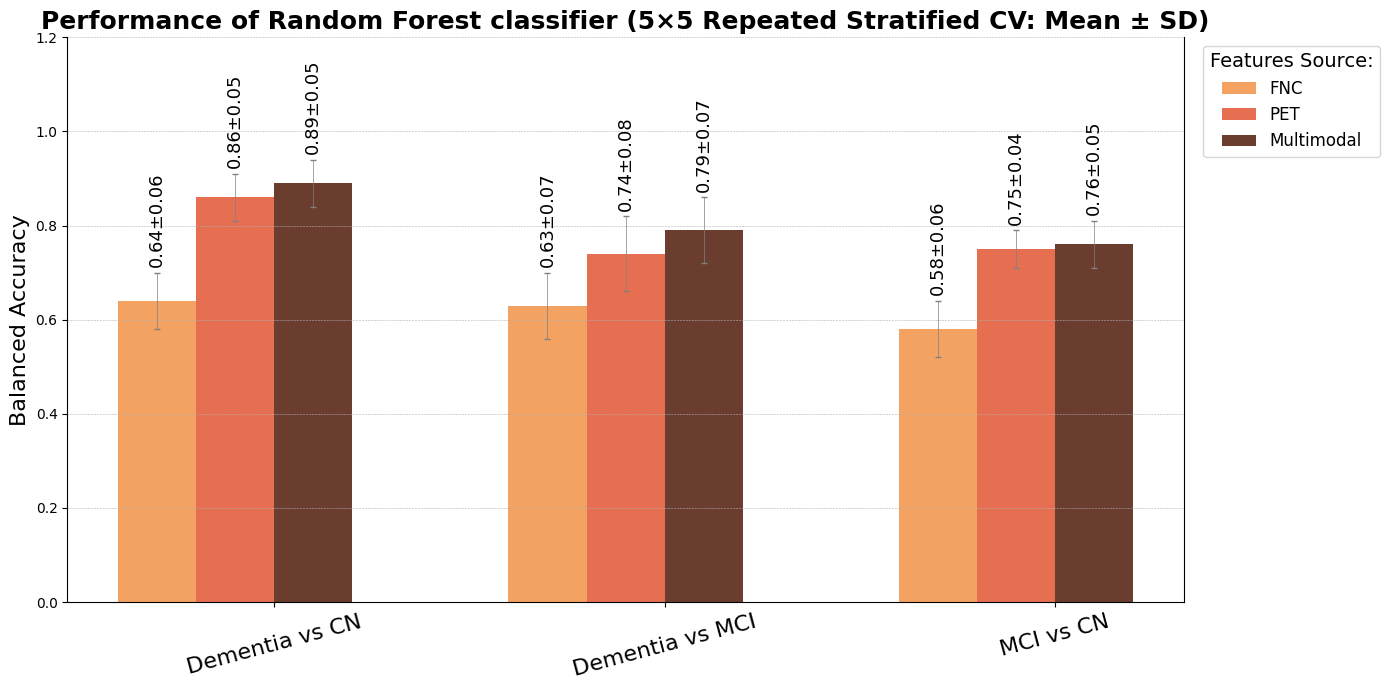

In [118]:
# Tasks and feature sets
tasks = ['Dementia vs CN', 'Dementia vs MCI', 'MCI vs CN']
feature_sets = ['FNC', 'PET', 'Multimodal']
colors = ['#f4a261', '#e76f51', '#6a3d2f']

# Balanced accuracy values
mean_bal_acc = np.array([
    [0.64, 0.86, 0.89],  # Dementia vs CN
    [0.63, 0.74, 0.79],  # Dementia vs MCI
    [0.58, 0.75, 0.76]   # MCI vs CN
])

std_bal_acc = np.array([
    [0.06, 0.05, 0.05],
    [0.07, 0.08, 0.07],
    [0.06, 0.04, 0.05]
])

# Plotting configuration
x = np.arange(len(tasks))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 7))

for i in range(len(feature_sets)):
    ax.bar(
        x + i * width,
        mean_bal_acc[:, i],
        width,
        yerr=std_bal_acc[:, i],
        capsize=2,
        error_kw={
            'elinewidth': 0.5,
            'ecolor': 'gray',
            'capthick': 1.0
        },
        color=colors[i],
        label=feature_sets[i]
    )

# Axis settings
ax.set_ylabel('Balanced Accuracy', fontsize=16)
ax.set_title(
    'Performance of Random Forest classifier (5×5 Repeated Stratified CV: Mean ± SD)',
    fontsize=18, fontweight='bold'
)
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(tasks, rotation=15, fontsize=16)
ax.set_ylim(0, 1.2)

# Legend
ax.legend(title='Features Source:', loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=12, title_fontsize=14)

# Annotate values
for i in range(len(tasks)):
    for j in range(len(feature_sets)):
        mean = mean_bal_acc[i, j]
        std = std_bal_acc[i, j]
        ax.text(
            x[i] + j * width,
            mean + std + 0.02,
            f"{mean:.2f}±{std:.2f}",
            ha='center',
            fontsize=13,
            rotation=90
        )

ax.grid(True, axis='y', linestyle='--', linewidth=0.4)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig('rf_balanced_accuracy_non_percent.png', dpi=600)
plt.show()


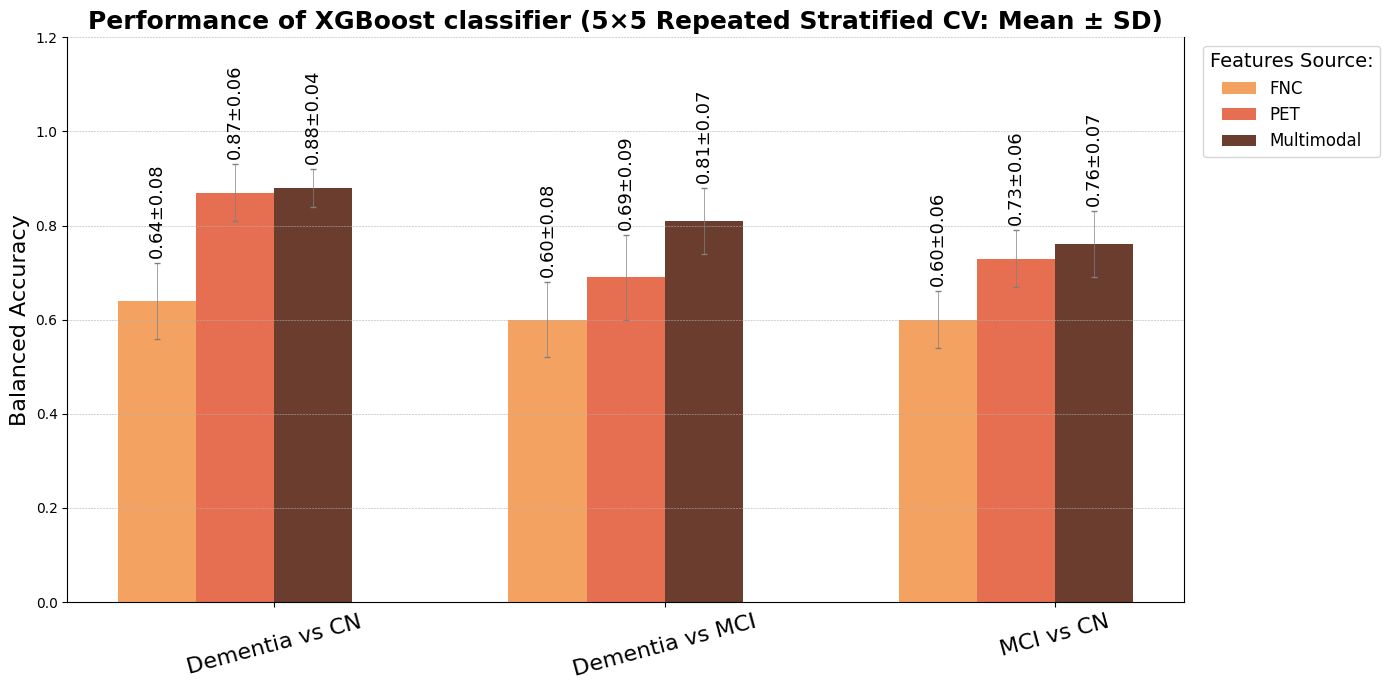

In [117]:
# Tasks and feature sets
tasks = ['Dementia vs CN', 'Dementia vs MCI', 'MCI vs CN']
feature_sets = ['FNC', 'PET', 'Multimodal']
colors = ['#f4a261', '#e76f51', '#6a3d2f']

# Balanced accuracy values
mean_bal_acc = np.array([
    [0.64, 0.87, 0.88],  # Dementia vs CN
    [0.60, 0.69, 0.81],  # Dementia vs MCI
    [0.60, 0.73, 0.76]   # MCI vs CN
])

std_bal_acc = np.array([
    [0.08, 0.06, 0.04],
    [0.08, 0.09, 0.07],
    [0.06, 0.06, 0.07]
])

# Plotting configuration
x = np.arange(len(tasks))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 7))

for i in range(len(feature_sets)):
    ax.bar(
        x + i * width,
        mean_bal_acc[:, i],
        width,
        yerr=std_bal_acc[:, i],
        capsize=2,
        error_kw={
            'elinewidth': 0.5,
            'ecolor': 'gray',
            'capthick': 1.0
        },
        color=colors[i],
        label=feature_sets[i]
    )

# Axis settings
ax.set_ylabel('Balanced Accuracy', fontsize=16)
ax.set_title(
    'Performance of XGBoost classifier (5×5 Repeated Stratified CV: Mean ± SD)',
    fontsize=18, fontweight='bold'
)
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(tasks, rotation=15, fontsize=16)
ax.set_ylim(0, 1.2)

# Legend
ax.legend(title='Features Source:', loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=12, title_fontsize=14)

# Annotate values
for i in range(len(tasks)):
    for j in range(len(feature_sets)):
        mean = mean_bal_acc[i, j]
        std = std_bal_acc[i, j]
        ax.text(
            x[i] + j * width,
            mean + std + 0.02,
            f"{mean:.2f}±{std:.2f}",
            ha='center',
            fontsize=13,
            rotation=90
        )

ax.grid(True, axis='y', linestyle='--', linewidth=0.4)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig('xgboost_balanced_accuracy_non_percent.png', dpi=600)
plt.show()


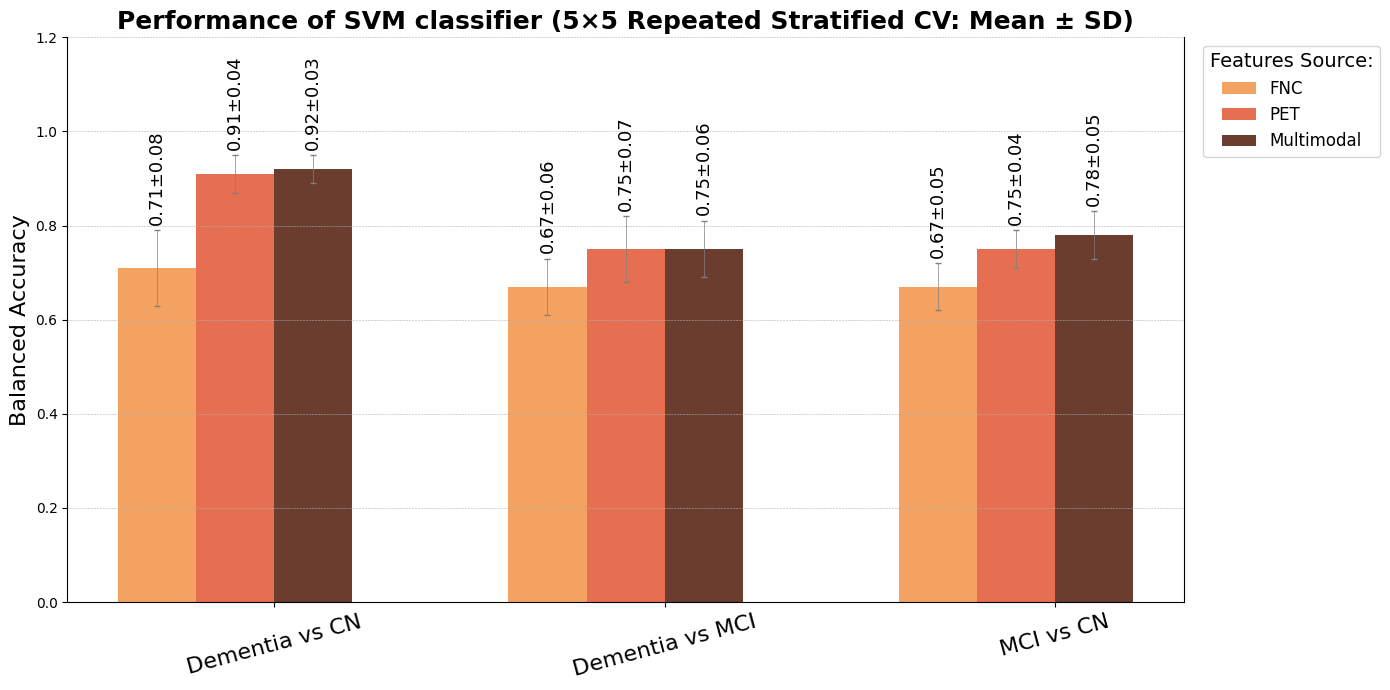

In [119]:
# Tasks and feature sets
tasks = ['Dementia vs CN', 'Dementia vs MCI', 'MCI vs CN']
feature_sets = ['FNC', 'PET', 'Multimodal']
colors = ['#f4a261', '#e76f51', '#6a3d2f']

# Balanced accuracy values (not in percent, range 0 to 1)
mean_bal_acc = np.array([
    [0.71, 0.91, 0.92],  # Dementia vs CN
    [0.67, 0.75, 0.75],  # Dementia vs MCI
    [0.67, 0.75, 0.78]   # MCI vs CN
])

std_bal_acc = np.array([
    [0.08, 0.04, 0.03],
    [0.06, 0.07, 0.06],
    [0.05, 0.04, 0.05]
])

# Plotting configuration
x = np.arange(len(tasks))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 7))

for i in range(len(feature_sets)):
    ax.bar(
        x + i * width,
        mean_bal_acc[:, i],
        width,
        yerr=std_bal_acc[:, i],
        capsize=2,
        error_kw={
            'elinewidth': 0.5,
            'ecolor': 'gray',
            'capthick': 1.0
        },
        color=colors[i],
        label=feature_sets[i]
    )

# Axis settings
ax.set_ylabel('Balanced Accuracy', fontsize=16)
ax.set_title(
    'Performance of SVM classifier (5×5 Repeated Stratified CV: Mean ± SD)',
    fontsize=18, fontweight='bold'
)
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(tasks, rotation=15, fontsize=16)
ax.set_ylim(0, 1.2)

# Legend
ax.legend(title='Features Source:', loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=12, title_fontsize=14)

# Annotate values
for i in range(len(tasks)):
    for j in range(len(feature_sets)):
        mean = mean_bal_acc[i, j]
        std = std_bal_acc[i, j]
        ax.text(
            x[i] + j * width,
            mean + std + 0.02,
            f"{mean:.2f}±{std:.2f}",
            ha='center',
            fontsize=13,
            rotation=90
        )

ax.grid(True, axis='y', linestyle='--', linewidth=0.4)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig('svm_balanced_accuracy_non_percent.png', dpi=600)
plt.show()
